**Data Analytics II**

**Importing required libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset**

In [ ]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'Age,EstimatedSalary,Purchased\r\n19,19000,0\r\n35,20000,0\r\n26,43000,0\r\n27,57000,0\r\n19,76000,0\r\n27,58000,0\r\n27,84000,0\r\n32,150000,1\r\n25,33000,0\r\n35,65000,0\r\n26,80000,0\r\n26,52000,0\r\n20,86000,0\r\n32,18000,0\r\n18,82000,0\r\n29,80000,0\r\n47,25000,1\r\n45,26000,1\r\n46,28000,1\r\n48,29000,1\r\n45,22000,1\r\n47,49000,1\r\n48,41000,1\r\n45,22000,1\r\n46,23000,1\r\n47,20000,1\r\n49,28000,1\r\n47,30000,1\r\n29,43000,0\r\n31,18000,0\r\n31,74000,0\r\n27,137000,1\r\n21,16000,0\r\n28,44000,0\r\n27,90000,0\r\n35,27000,0\r\n33,28000,0\r\n30,49000,0\r\n26,72000,0\r\n27,31000,0\r\n27,17000,0\r\n33,51000,0\r\n35,108000,0\r\n30,15000,0\r\n28,84000,0\r\n23,20000,0\r\n25,79000,0\r\n27,54000,0\r\n30,135000,1\r\n31,89000,0\r\n24,32000,0\r\n18,44000,0\r\n29,83000,0\r\n35,23000,0\r\n27,58000,0\r\n24,55000,0\r\n23,48000,0\r\n28,79000,0\r\n22,18000,0\r\n32,117000,0\r\n27,20000,0\r\n25,87000,0\r\n23,66000,0\r\n32,120000,1\r\n59,83000,0\r\n24,58000,0\r\n24,19000

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

**Data Pre-processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Checking for null values**

In [ ]:
df.isnull()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Using Logistic Regression to create model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
x = df.drop(['Purchased'], axis = 1)
y = df['Purchased']



In [ ]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Calculate the required evaluation parameters**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

In [ ]:
logreg.fit(xtrain,ytrain)


LogisticRegression()

In [ ]:
y_pred=logreg.predict(xtest)

In [ ]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score,classification_report
cm= confusion_matrix(ytest, y_pred)

In [ ]:
cm

array([[58,  0],
       [22,  0]])

In [ ]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.725


In [ ]:
ps= precision_score(ytest,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ps

0.0

In [ ]:
rs=recall_score(ytest,y_pred)

In [ ]:
rs

0.0

In [ ]:
print ("Error Rate : ",1-accuracy_score(ytest, y_pred))

Error Rate :  0.275


In [ ]:
print ("Classification Report", classification_report(ytest, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


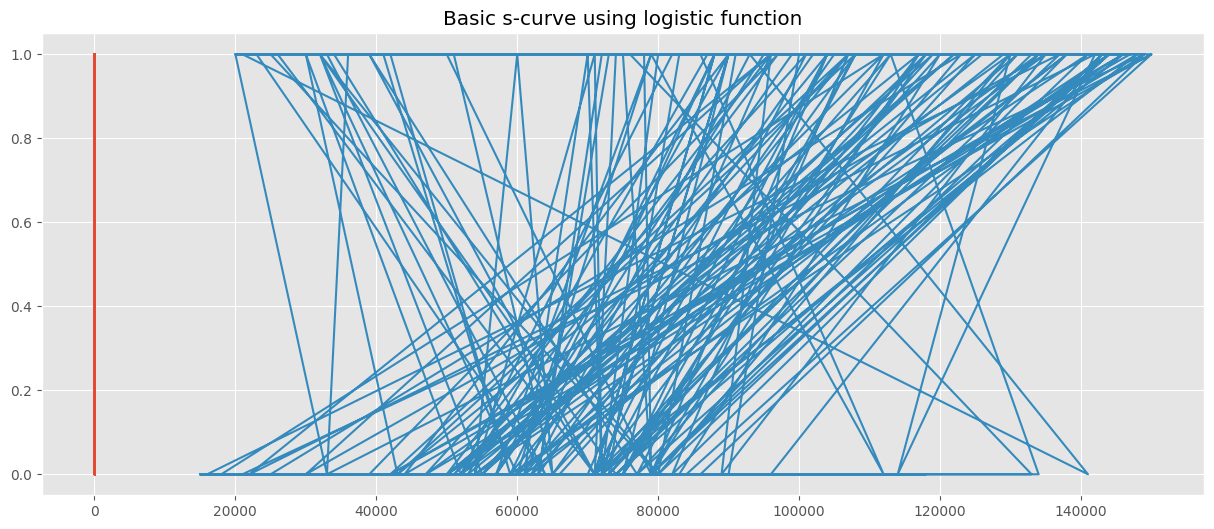

In [ ]:
from scipy.special import expit as logistic
import warnings
plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y)
_ = ax.set_title('Basic s-curve using logistic function')